<a href="https://colab.research.google.com/github/emerymoriconi/deep-learning/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
import sys
sys.version

'3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]'



> **ANOTAÇÕES TEÓRICAS:**


Neurônio artificial: Entradas * Pesos = Função soma -> Função de ativação.

Funcionamento básico de uma rede neural:

1. Multiplica as entradas pelos pesos

2. Faz o somatório

3. Aplica uma função de ativação (evita que o resultado seja dentro de um intervalo muito grande).

4. De acordo com uma certa condição, ele toma uma decisão.   

Multicamada é necessária quando o problema não é linearmente separável (Ex: XOR).

**IMPORTANTE:** Inicialmente os pesos e o bias são iniciados aleatoriamente. São eles quem a Inteligência Artificial terá que descobrir.

ERRO = resposta esperada - resposta encontrada.

A aprendizagem em uma rede neural é encontrar o melhor conjunto de pesos com base no cálculo dos erros.

Quanto menor o valor do erro encontrado, melhor é o valor escolhido para os pesos. Após o cálculo do erro médio, existem algoritmos que servem para ajustar o melhor conjunto de pesos para o problema.

Trabalho básico de uma rede neural: *calcula o erro -> ajusta os pesos -> calcula o erro -> ajusta os pesos -> calcula o erro -> ajusta...* (e assim por diante até que o erro seja o menor possível).

**Descida do Gradiente:** atualiza-se os pesos e nisso estamos buscando a descida do gradiente até encontrarmos o menor valor possível para o erro.

```
min C(w1, w2, w3 ... wn)
```
**Custo mínimo** ou **LossFunction** (função de perda): é a maneira como a rede neural faz a atualização dos pesos. Calcula-se a derivada parcial para mover na direção do gradiente.


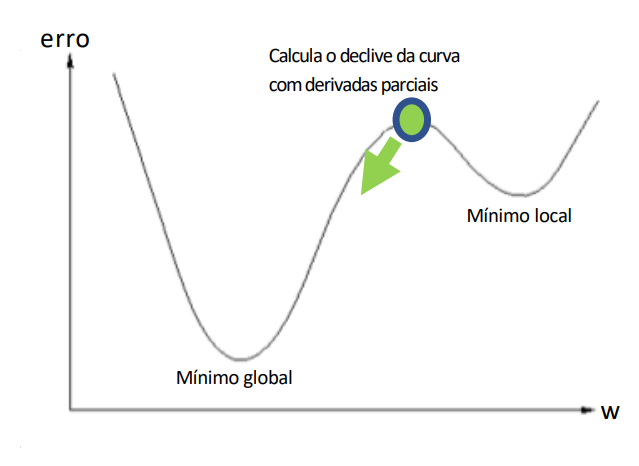

O cálculo do gradiente irá fazer os pesos (w) se deslocarem até o mínimo global da função, onde o erro será o menor possível.

Algoritmo de atualização dos pesos:


1.   Função de ativação (aplicada no valor da soma);


> as funções de ativação são importantes para fazer a transferência dos valores de uma parte da rede neural para outra parte da rede, utilizada para determinar a saída do neurônio.


2.   Derivada da função;

1.   Delta;
2.   Gradiente (indica qual direção deve ser seguida).

**Delta da camada de saída:** Erro * Derivada da função.

**Delta da camada oculta:** Derivada da função * Peso * Delta da camada de saída (serão encontrados valores de delta diferentes para cada neurônio da camada oculta).

Algoritmo *backpropagation* (algoritmo de ajuste dos pesos):



```
peso(n+1) = (peso(n) * momento) + (entrada * delta * taxa de aprendizagem)
```


> Peso (n+1): peso da próxima iteração (atualizado).


> Momento: parâmetro auxiliar que "acelera" ou otimiza o processo da descida do gradiente para encontrarmos o mínimo global.

O algorimo é chamado de *backpropagation* pois os valores chegam na camada de saída e depois do cálculo do erro, os pesos vão sendo atualizados da camada de saída até a camada de entrada (para trás).










> **Outros tópicos importantes:**



**Bias:** neurônio adicional ligado aos outros neurônios. As bibliotecas já vêm com essa unidade de *bias* pré-configurada. Apenas muda a saída para evitar que o resultado tenha sempre o mesmo valor.

Outras maneiras de calcular o erro (formas mais robustas): MSE - mean square error, RMSE - root mean square error.

**SGD (Stochastic Gradient Descent):** Calcula o erro para cada registro e atualiza os pesos.

**GD (Descida do Gradiente):** A descida do gradiente estocástica (**SGD**) ajuda a prevenir mínimos locais (superfícies não convexas) e é mais rápido por não precisar carregar todos os dados em memória. O **MBGD** (Mini batch gradient descent) escolhe um número de registros para rodar e atualizar os pesos.

**Épocas:** número de atualizações de pesos que serão realizadas.




> **Funções de ativação:**



1.   Step Function (função degrau)

  Valor 0 ou 1.





In [ ]:
import numpy as np
#também chamada de transfer function

def stepFunction(soma):
  if (soma >= 1):
    return 1
  return 0

teste = stepFunction(-1)

0




> **Funções de ativação:**


1.   Sigmoid (função sigmoide)

  Valor 0 ou 1. Utilizada em problemas de classificação binária.





In [ ]:
import numpy as np

def sigmoidFunction(soma):
  return 1 / (1 + np.exp(-soma))

teste = sigmoidFunction(2.1)
print(teste)

0.8909031788043871


> **Funções de ativação:**


1.   Hyperbolic tanget (função tangente hiperbólica)

  Valores entre -1 e 1.

In [ ]:
import numpy as np

def thanFunction(soma):
  return (np.exp(soma) - np.exp(-soma)) / (np.exp(soma) + np.exp(-soma))

teste = thanFunction(2.1)
print(teste)

0.9704519366134541


> **Funções de ativação:**


1.   ReLu (Rectified Linear Units)

  Valores 0 ou > 0. Não existe um valor máximo a ser retornado. Função mais utilizada atualmente, principalmente nas CNN's.

  Obs: redes neurais profundas são aquelas que utilizam um número maior de camadas.

In [ ]:
import numpy as np

def reluFunction(soma):
  if soma >= 0:
    return soma
  return 0

teste = reluFunction(2.1)
print(teste)

2.1


> **Funções de ativação:**


1.   Linear (função linear)

  Retorna o valor passado. Não faz nada, muito utilizada em problemas de regressão.

In [ ]:
import numpy as np

def linearFunction(soma):
  return soma

> **Funções de ativação:**


1.   Softmax

  Utilizada quando existem muitas classes. Retorna probabilidades para cada uma das classes e a maior delas é a resposta final.


In [ ]:
import numpy as np

#recebe um vetor de valores de cada uma das classes
#aplicada na camada de saída
def softmaxFunction(x):
  ex = np.exp(x)
  return ex / ex.sum()

#exemplo de valores que foram retornados na camada de saída
#probabilidades serão associadas à cada um deles
#quanto maior o valor, maior a probabilidade (pega o máximo)
valores = [5.0, 2.0, 1.3]
print(softmaxFunction(valores))

[0.93065625 0.04633465 0.0230091 ]


**Breast Cancer - Atividade de classificação binária**


**Classe_teste e Previsores_teste**: importantes para avaliar o desempenho da rede neural que está sendo utilizada.

**Sequential no Keras**: classe que será utilizada durante todo o curso para a criação da rede neural (sequência de camadas).

**Dense no Keras**: serão utilizadas camadas densas na rede neural (cada um dos neurônios é ligado a todos os outros neurônios da camada oculta).



> Criando a rede neural:



```
classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer='random_uniform', input_dim = 30))
```



1.   Units = 16: número de neurônios da camada oculta (segue a fórmula: [entradas + saídas] / 2);
2.   Activation = 'relu': usa a função de ativação ReLu;
1.   Kernel_initializer: inicializa os pesos aleatoriamente;
2.   Input_dim: tamanho da camada de entrada (são 30 classes). Só é colocada na primeira camada oculta, parâmetro desnecessário nas camadas ocultas seguintes.





In [ ]:
import pandas as pd

#atributos previsores
previsores = pd.read_csv('entradas_breast.csv')
#respostas (onde queremos chegar, o que queremos prever)
classe = pd.read_csv('saidas_breast.csv')

#função automática da biblioteca Sklearn que faz uma divisão da base de dados entre treinamento e teste
from sklearn.model_selection import train_test_split
#teste_size indica qual porcentagem da base de dados será usada para fazer os testes
#nesse caso será 25% para teste e 75% para treinamento
#problema de classificação binária: 0 (câncer benigno) ou 1 (câncer maligno)
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

#construção da rede neural
import keras
from keras.models import Sequential
#serão utilizadas camadas densas na rede neural
from keras.layers import Dense
classificador = Sequential()
classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer='random_uniform', input_dim = 30))
#adicionando mais uma camada oculta na minha rede
classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer='random_uniform'))
#construindo a camada de saída (apenas 1 neurônio) e a função de ativação usada é a sigmoid por ser um problema de classificação binária(0 ou 1)
classificador.add(Dense(units = 1, activation = 'sigmoid'))
#compilamos a rede neural
#optimizer=adam: otimizador da descida do gradiente estocástica
#loss=binary_crossentropy: cálculo do erro
#também podemos customizar o otimizador pois ele sempre vem com as configurações default
otimizador = keras.optimizers.Adam(learning_rate = 0.001, weight_decay = 0.0001, clipvalue = 0.5)
classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
#treinamento efetivo da rede neural
#batch_size: ajusta os pesos após o cálculo de erro a cada 10 registros
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10, epochs = 100)

#conjunto de pesos que a rede neural consegue aprender
#como fazemos a visualização dos pesos? por meio das camadas (layers)
pesos0 = classificador.layers[0].get_weights()
pesos1 = classificador.layers[1].get_weights()
pesos2 = classificador.layers[2].get_weights()

#teste de acurácia sobre base de dados correta (a base de teste)
previsoes = classificador.predict(previsores_teste)
#para ela devolver valores de 0 ou 1 (arredondamento) e podermos comparar com as saídas
previsoes = (previsoes > 0.5)

#comparativo entre as saídas esperadas e as saídas adquiridas na base de dados de teste
from sklearn.metrics import confusion_matrix, accuracy_score
#passa como parâmetro os valores que queremos comparar
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
#tumores malignos classificados como benignos (o que queremos que seja o menor possível) ou malignos, tumores benignos classificados como benignos ou malignos
#essa mesma comparação pode ser feita usando o Keras
resultado = classificador.evaluate(previsores_teste, classe_teste)

**Avaliação de um algoritmo**

Para fazer a avaliação de um algortimo, são necessárias duas bases de dados diferentes: a de treinamento e a de teste. Com a base de treinamento, uma tabela de probabilidade é gerada e depois é comparada com a base de teste para que comparações e previsões possam ser feitas. Porém, algumas vezes a base escolhida para ser de teste poderia apresentar melhores resultados (serem previsores melhores, com melhores generalizações) se fosse utilizada como base de dados de treinamento. É utilizada então a **K-fold Cross Validation** ou Validação Cruzada.

Todos os registros então são utilizados para treinamento e para teste, mesmo ainda tendo bases de dados separadas para teste e treinamento. A depender do valor escolhido para **K** (K = 10 é o mais utilizado pela comunidade científica), a base de dados é "quebrada" em **K** pedaços e ora um fold se comporta como base para teste (apenas um é escolhido por vez), ora se comporta como base para treinamento. Em seguida, é realizada a média dos resultados para cada fold e este é o acerto do algoritmo em questão.